# Image Recognition

## Image Classifier

Create your first Image Recognition Classifier using `CNN`, `Keras`, and `Tensorflow` backends.

In [2]:
from IPython.display import Image

## Dog or Cat?

The idea of this tutorial is to create a simple Dog/Cat Image classifier.

### Step 1: Collecting Data

We need a lot of data to train our algorithm so that our model can learn from them by identifying certain relations and common features related to the objects.

![Dataset](./res/img/cats_dogs.png)

### Step 2: Importing Libraries and Splitting Data into Train and Test Sets

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

After the import, we have to split our data into a _training set_ and _testing set_. In our case, this is already done.

### Step 3: Building a Network

This is the most important step in creating our network. It consists of 4 parts:
1. Convolution
2. Pooling
3. Flattening
3. Full connection

In [4]:
# initialise the CNN
clf = Sequential()

In [5]:
# Step 1: Convolution
clf.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))

# Step 2: Pooling
clf.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3: Flattening
clf.add(Flatten())

# Step 4: Full connection
clf.add(Dense(128, activation='relu'))
clf.add(Dense(1, activation='sigmoid'))

In [6]:
# compiling the CNN
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               409728    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 410,753
Trainable params: 410,753
Non-trainable params: 0
__________________________________________________

#### 1. Convolution

The primary purpose of convolution is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.

First 3 parameters refer to:
- `filters`: dimensionality of the output space (i.e. the number of output filters in the convolution); in this case, 32 x 32
- `kernel_size`: specifying the height and width of the 2D convolution window (can be a tuple if we don't want a sqaure)
- `strides`: specifying the strides of the convolution along with the height and width (can be a tuple if we want a different height and width)

#### 2. Pooling

In the case of Max Pooling, we use the parameter `pool_size` to define a spatial neighborhood (in our case a 2x2 window) and take the largest element from the rectified feature map within that window.

#### 3. Flattening

We convert the matrix into a 1D array which can be the input of the final Neural Network.

#### 4. Full Connection

### Stage 4: Data Augmentation

We need a lot of data to train a network but suppose we have a limited number of images for our network--what do we do? We don't need to hunt for new images that can be added to our dataset. To get more data, we just need to make alterations to our existing dataset--minor changes such as flips, translations, or rotations--and our neural network will think these are distinct images anyway. Data augmentation is a way of reducing overfitting of models, where we increase the amount of training data using only the information from our training data. The field of data augmentation is not new and, in fact, there are various data augmentation techniques for specific problems.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

In [10]:
training_set = train_datagen.flow_from_directory('__lhlrepos__/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('__lhlrepos__/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Step 5: Training

In [19]:
training_set.shape

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

In [11]:
history = clf.fit(training_set,
                  steps_per_epoch=50,
                  epochs=10,
                  validation_data=test_set)

2022-05-27 23:29:00.701432: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
50/50 [==============================] - 6s 117ms/step - loss: 0.7021 - accuracy: 0.5063 - val_loss: 0.6803 - val_accuracy: 0.6095
Epoch 2/10
50/50 [==============================] - 5s 104ms/step - loss: 0.6788 - accuracy: 0.5663 - val_loss: 0.6603 - val_accuracy: 0.6065
Epoch 3/10
50/50 [==============================] - 5s 103ms/step - loss: 0.6565 - accuracy: 0.6300 - val_loss: 0.6438 - val_accuracy: 0.6460
Epoch 4/10
50/50 [==============================] - 5s 102ms/step - loss: 0.6463 - accuracy: 0.6212 - val_loss: 0.6270 - val_accuracy: 0.6535
Epoch 5/10
50/50 [==============================] - 5s 103ms/step - loss: 0.6160 - accuracy: 0.6669 - val_loss: 0.6049 - val_accuracy: 0.6855
Epoch 6/10
50/50 [==============================] - 5s 104ms/step - loss: 0.6203 - accuracy: 0.6575 - val_loss: 0.6085 - val_accuracy: 0.6720
Epoch 7/10
50/50 [==============================] - 5s 103ms/step - loss: 0.5945 - accuracy: 0.6794 - val_loss: 0.5857 - val_accuracy: 0.6980
Epoch 

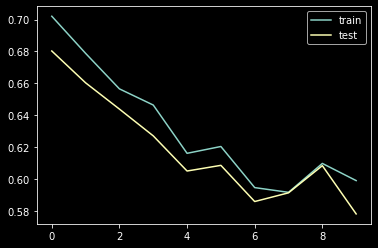

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Step 6: Testing

In [13]:
import numpy as np

In [14]:
from tensorflow.keras.preprocessing import image

In [15]:
# loading an image from the disk
test_image = image.load_img('./res/data/roar.png', target_size=(64, 64))


In [16]:
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = clf.predict(test_image)

In [17]:
result

array([[1.]], dtype=float32)

In [18]:
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print(prediction)

dog
